### Background

Questo notebook include un esempio di esercizio sull'effetto della pseudorapidità alla risoluzione del rivelatore CMS. L'esercizio consiste in una parte teorica e una parte pratica.

# L'effetto della pseudorapidità $\eta$ sulla risoluzione del rivelatore CMS


In questo esercizio viene introdotto il concetto di pseudorapidità. Con i dati reali raccolti dal rivelatore CMS si osserva l'effetto della pseudorapidità sulla risoluzione dello stesso.

### Pseudorapidità

Nella fisica sperimentale delle particelle la pseudorapidità $\eta$ è una coordinata spaziale usata per descrivere l'angolo tra una particella e il fascio di particelle. La pseudorapidità è determinata dall'equazione

$$ \eta \equiv -\ln(\tan(\frac{\theta}{2})), $$

dove $ \theta$ è l'angolo di una particella rispetto al fascio di particelle.

La pseudorapidità descrive quindi l'angolo tra una particella rilevata e il fascio di particelle. Nell'immagine qui sotto il fascio di particelle andrebbe orizzontalmente da sinistra a destra. Quindi con i grandi valori di $\eta$ una particella creata nella collisione si discosterebbe di poco dalla direzione del fascio di particelle. Con i piccoli valori di $\eta$ la deviazione è maggiore.


<img src="../Images/Pseudorapidity_plot.png" alt="Image of pseudorapidity values" style="height: 200px">

(Image: Wikimedia user Mets501, Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=20392149)
<br>
<br>
<br>

### L'effetto della pseudorapidità sulla risoluzione delle misure

La pseudorapidità influenza la risoluzione della misura della quantità di moto. Le particelle che colpiscono nella parte centrale del rivelatore (nel barrel) possono essere misurate più accuratamente delle particelle che colpiscono alla fine del rivelatore (nell'endcap).

La ragione di ciò è probabilmente che le particelle che sono volate verso l'endcap hanno incontrato più materia (altre particelle) rispetto alle particelle colpite nel barrel. L'interazione con altra materia causerà un'imprecisione nelle misurazioni delle particelle colpite nell'endcap.

Nell'immagine qui sotto c'è una rappresentazione delle due particelle create nell'evento di collisione. Una colpisce il barile del rivelatore e un'altra colpisce l'endcap. Ci sono anche i valori delle pseudorapidità $\eta$ e gli angoli $\theta$ delle particelle.


<img src="../Images/Sylinder.png" alt="Draft of the CMS detector" style="height: 300px">

### Diamoci dentro!

Cominciamo ad osservare come l'effetto della pseudorapidità sulla risoluzione della misura può essere visto con i dati reali raccolti da CMS.

Useremo i dati raccolti nel 2011 [1]. Dal dataset primario sono stati selezionati 10851 eventi di collisione con esattamente due muoni nel file "Zmumu_Run2011A_masses.csv". (La selezione è stata fatta con il codice che è disponibile su https://github.com/tpmccauley/dimuon-filter.) Le quantità di moto e le energie misurate dei muoni sono scritte nel file.

Dai valori misurati di momenti ed energie, viene calcolata la massa invariante dei muoni per ogni evento, tramite l'equazione

$$ M = \sqrt{(E_1 + E_2)^2-(\vec{p_1} + \vec{p_2})^2}. $$

Nell'equazione $E_1$ e $E_2$ sono le energie dei muoni e $vec{p_1}$ e $vec{p_2}$ i momenti dei muoni.

Se la coppia di muoni proviene dal decadimento del bosone Z, la massa invariante calcolata per quella coppia di muoni è uguale alla massa fisica del bosone Z (91,1876 GeV, [Particle Data Group](http://pdg.lbl.gov/2012/listings/rpp2012-list-z-boson.pdf)). Se i due muoni provengono da qualche altro processo (ci sono molti processi diversi nelle collisioni di particelle) allora la massa invariante calcolata per loro avrà un altro valore.

Osserviamo le masse invarianti calcolate per diversi eventi tracciandone un istogramma. L'istogramma mostra in quanti eventi il valore della massa invariante si è trovato in un certo intervallo di valori. Con l'istogramma si può vedere quanto vicini alla massa del bosone Z (91,1876 GeV) saranno i diversi valori di massa invariante.


[1]  CMS collaboration (2016). DoubleMu dataset primario in formato AOD dalla RunA del 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).

### 1) Selezione degli eventi

<img src="../Images/Pseudorapidity_plot.png" alt="Image of pseudorapidity values" style="height: 200px">

(Immagine: Wikimedia user Mets501, Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=20392149)

Per prima cosa selezioneremo da tutti gli eventi in due gruppi gli eventi in cui la pseudorapidità dei due muoni è stata relativamente alta (es. $\eta$ > 1,52) e relativamente bassa (es. $\eta$ < 0,45). La selezione è fatta con il codice qui sotto. Vogliamo circa la stessa quantità di eventi in entrambi i gruppi in modo che il confronto possa essere affidabile.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creiamo un nuovo DataFrame dal file "Zmumu_Run2011A_masses.csv"
dataset = pd.read_csv('../Data/Zmumu_Run2011A_masses.csv')

# Settiamo le condizioni per alte e basse eta. 
# Possono essere cambiate, ma bisogna selezionare lo stesso numero di eventi in ciascun gruppo.
cond1 = 1.52
cond2 = 0.45

# Creiamo i due DataFrame, sia per eta alte che basse.
alte_eta = dataset[(abs(dataset.eta1) > cond1) & (abs(dataset.eta2) > cond1)]
basse_eta = dataset[(abs(dataset.eta1) < cond2) & (abs(dataset.eta2) < cond2)]

print('Numero di tutti gli eventi = ',  len(dataset))
print('Numero degli eventi in cui la pseudorapidità di entrambi i muoni è alta = ', len(alte_eta))
print('Numero degli eventi in cui la pseudorapidità di entrambi i muoni è bassa = ', len(basse_eta))


Numero di tutti gli eventi =  10851
Numero degli eventi in cui la pseudorapidità di entrambi i muoni è alta =  615
Numero degli eventi in cui la pseudorapidità di entrambi i muoni è bassa =  603


### 2) Creare gli istogrammi

Ora creiamo separatamente gli istogrammi delle masse invarianti per gli eventi con le pseudorapidità alte e basse, in modo da confrontare queste due situazioni.

### Istogrammi per eventi con alte $\eta$

Iniziamo con gli eventi in cui le pseudorapidità dei muoni sono __alte__.

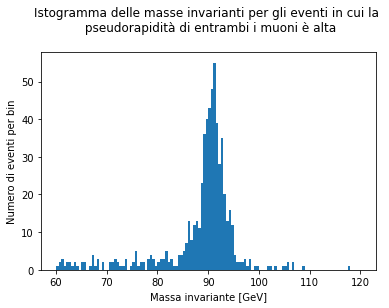

In [36]:
# Salviamo le masse invarianti nella variabile "massa_inv1".
massa_inv1 = basse_eta['M']

# Creiamo l'istogramma con massa_inv1. Settiamo i bins e il range.
plt.hist(massa_inv1, bins=120, range=(60,120))

# Diamo un titolo agli assi e alla figura.
plt.xlabel('Massa invariante [GeV]')
plt.ylabel('Numero di eventi per bin')
plt.title('Istogramma delle masse invarianti per gli eventi in cui la \n pseudorapidità di entrambi i muoni è alta\n')
plt.show()



### Istogrammi per eventi con basse $\eta$

Come sopra, plottiamo l'istogramma delle masse invarianti per gli eventi in cui le pseudorapidità dei muoni sono __basse__.

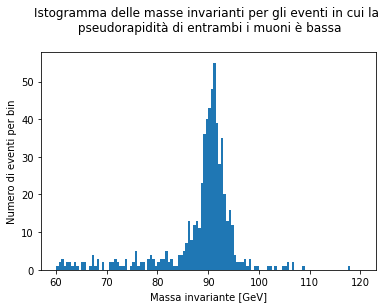

In [37]:
# Salviamo le masse invarianti nella variabile "massa_inv2".
massa_inv2 = basse_eta['M']

# Creiamo l'istogramma con massa_inv2. Settiamo i bins e il range.
plt.hist(massa_inv2, bins=120, range=(60,120))

# Diamo un titolo agli assi e alla figura.
plt.xlabel('Massa invariante [GeV]')
plt.ylabel('Numero di eventi per bin')
plt.title('Istogramma delle masse invarianti per gli eventi in cui la \n pseudorapidità di entrambi i muoni è bassa\n')
plt.show()



### 3) Esercizio

Ora abbiamo creato dai dati reali CMS i due istogrammi delle masse invarianti. Con l'aiuto degli istogrammi e della parte teorica del notebook pensa alle seguenti domande:

__In che modo puoi vedere l'effetto della pseudorapidità sulla risoluzione di misura del rivelatore CMS?__

__I tuoi risultati sono coerenti con quelli previsti dalla teoria?__

Dopo aver risposto alle domande puoi provare a cambiare le condizioni per le pseudorapidità alte e basse nella prima cella del codice. Le condizioni sono chiamate _cond1_ e _cond2_. Assicuratevi di scegliere le condizioni in modo che ci sia quasi la stessa quantità di eventi in entrambi i gruppi.

Dopo le modifiche eseguite nuovamente il codice. Come influiscono le modifiche sul numero di eventi? E sugli istogrammi?